# 图像复原与重建

In [1]:
import filter
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

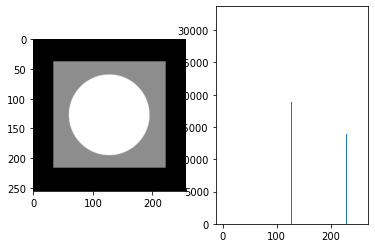

In [2]:
_, axe = plt.subplots(1, 2)

img = cv.imread('./image/Fig0503 (original_pattern).tif', cv.IMREAD_GRAYSCALE)
axe[0].imshow(img, cmap = 'gray')
axe[1].hist(img.ravel(), 256, [0, 256])

plt.show()

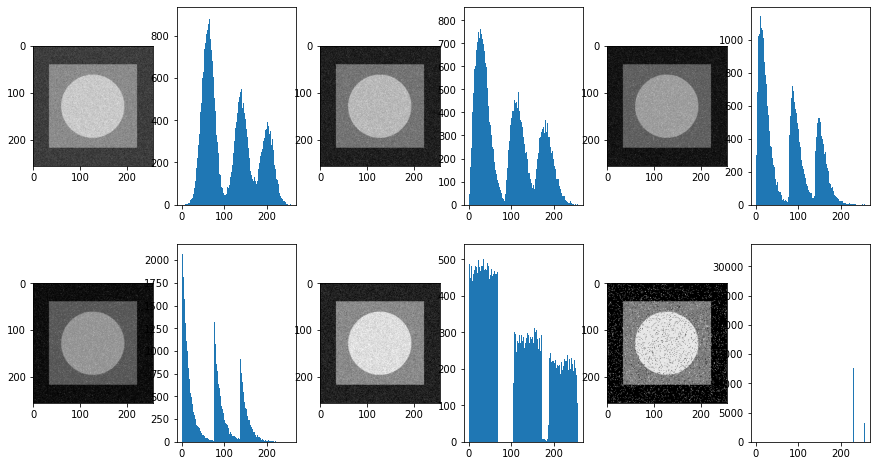

In [3]:
_, axe = plt.subplots(2, 6, figsize = (15, 8))

#高斯噪声
img = cv.imread('./image/Fig0504(a)(gaussian-noise).tif', cv.IMREAD_GRAYSCALE)
axe[0, 0].imshow(img, cmap = 'gray')
axe[0, 1].hist(img.ravel(), 256, [0, 256])

#瑞利噪声
img = cv.imread('./image/Fig0504(b)(rayleigh-noise).tif', cv.IMREAD_GRAYSCALE)
axe[0, 2].imshow(img, cmap = 'gray')
axe[0, 3].hist(img.ravel(), 256, [0, 256])

#爱尔兰噪声
img = cv.imread('./image/Fig0504(c)(gamma-noise).tif', cv.IMREAD_GRAYSCALE)
axe[0, 4].imshow(img, cmap = 'gray')
axe[0, 5].hist(img.ravel(), 256, [0, 256])

#指数噪声
img = cv.imread('./image/Fig0504(g)(neg-exp-noise).tif', cv.IMREAD_GRAYSCALE)
axe[1, 0].imshow(img, cmap = 'gray')
axe[1, 1].hist(img.ravel(), 256, [0, 256])

#均匀噪声
img = cv.imread('./image/Fig0504(h)(uniform-noise).tif', cv.IMREAD_GRAYSCALE)
axe[1, 2].imshow(img, cmap = 'gray')
axe[1, 3].hist(img.ravel(), 256, [0, 256])

#椒盐噪声
img = cv.imread('./image/Fig0504(i)(salt-pepper-noise).tif', cv.IMREAD_GRAYSCALE)
axe[1, 4].imshow(img, cmap = 'gray')
axe[1, 5].hist(img.ravel(), 256, [0, 256])

plt.show()

## 空间滤波

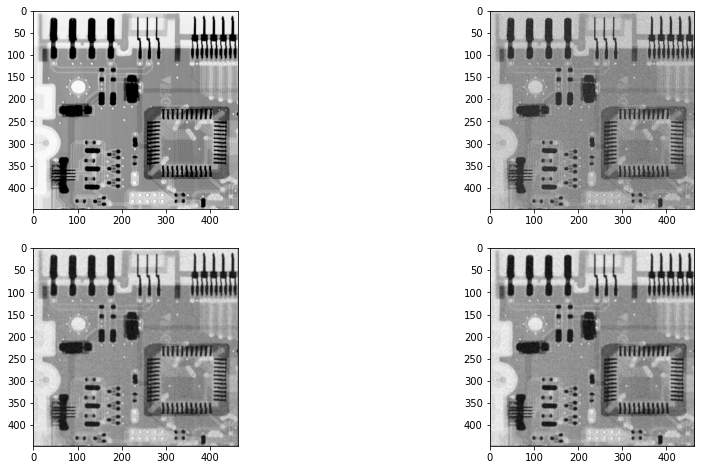

In [3]:
_, axe = plt.subplots(2, 2, figsize = (15, 8))
img_o = cv.imread('./image/Fig0507(a)(ckt-board-orig).tif', cv.IMREAD_GRAYSCALE)
img_g = cv.imread('./image/Fig0507(b)(ckt-board-gauss-var-400).tif', cv.IMREAD_GRAYSCALE)

#原图片
axe[0, 0].imshow(img_o, cmap = 'gray')

#加性高斯噪声污染
axe[0, 1].imshow(img_g, cmap = 'gray')

#算数平均滤波器
img_f = filter.arithmetic_average_filter(img_g, 3, 3)
axe[1, 0].imshow(img_f, cmap = 'gray')

#几何均值滤波器
imgf = filter.Geometric_mean_filter(img_g, 3, 3)
axe[1, 1].imshow(img_f, cmap = 'gray')

## 统计排序滤波器

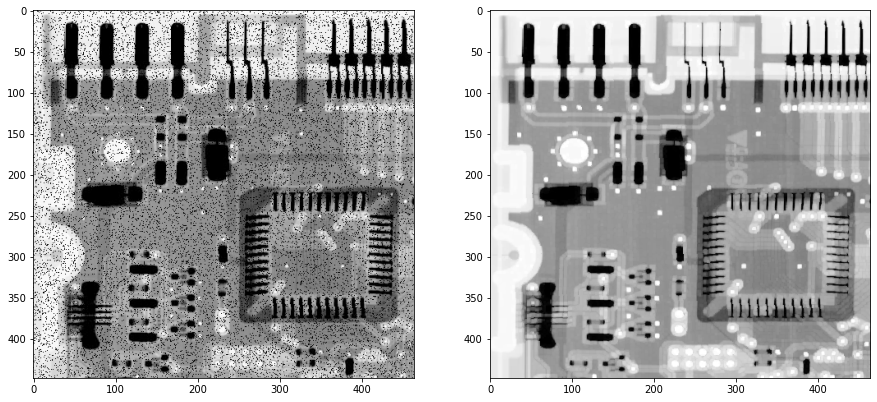

In [5]:
_, axe = plt.subplots(1, 2, figsize = (15, 8))

#被概率为0.1的胡椒噪声污染
img_p = cv.imread('./image/Fig0508(a)(circuit-board-pepper-prob-pt1).tif', cv.IMREAD_GRAYSCALE)
axe[0].imshow(img_p, cmap = 'gray')

#最大值滤波器
img_f = filter.maximum_filter(img_p, 3, 3)
axe[1].imshow(img_f, cmap = 'gray')

## 频率域滤波

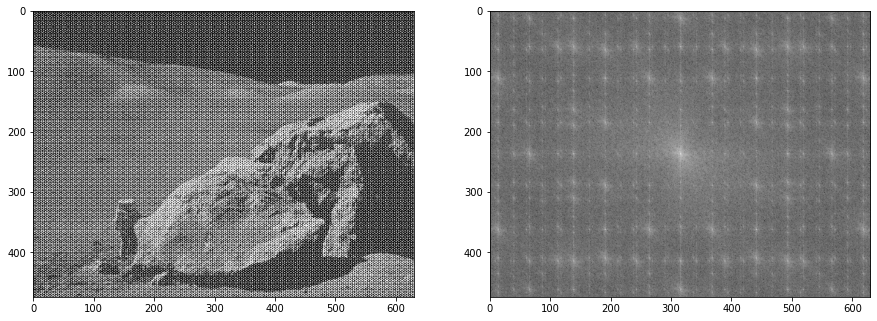

In [4]:
_, axe = plt.subplots(1, 2, figsize = (15, 8))
img_s = cv.imread('./image/Fig0516(a)(applo17_boulder_noisy).tif', cv.IMREAD_GRAYSCALE)
axe[0].imshow(img_s, cmap = 'gray')

img_fft = np.fft.fft2(img_s)
img_fft = np.fft.fftshift(img_fft)
axe[1].imshow(np.log(1 + np.abs(img_fft)), cmap = 'gray')
#www.imageprocessingplace.com 目前还没有第四版课本上的图片数据集
#img_f = filter.butterworth_filter()